<a href="https://colab.research.google.com/github/royparth20/CO-LAB.GOOGLE/blob/master/Cancer_Breast_ANN%20with%20Hyper%20Parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [ ]:
uploaded
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


B    357
M    212
Name: diagnosis, dtype: int64


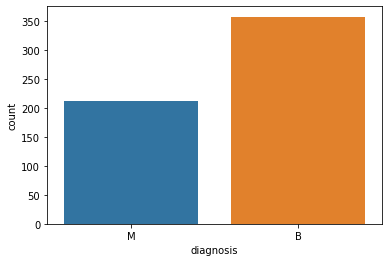

In [ ]:
import seaborn as sns
ax =  sns.countplot(data['diagnosis'])
print(data['diagnosis'].value_counts())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

del data['Unnamed: 32']

In [ ]:
X =  data.iloc[:,2:].values
Y =  data.iloc[: ,1].values

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
Y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [ ]:
!pip install keras

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
classifier = Sequential()
#First Layer (Input + Hidden Layer)
classifier.add(Dense(output_dim = 16,init='uniform',activation='relu',input_dim=30 ))
#Second Layer (Hidden Layer)
classifier.add(Dense(output_dim = 16,init='uniform',activation='relu'))
#Third Layer (Output Layer)
classifier.add(Dense(output_dim = 1,init='uniform',activation="sigmoid" ))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


In [ ]:
classifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
classifier.weights

[<tf.Variable 'dense_1/kernel:0' shape=(30, 16) dtype=float32, numpy=
 array([[-4.35644872e-02, -2.90952325e-02, -3.33251953e-02,
         -2.56953482e-02, -3.01806927e-02,  9.17050987e-03,
         -2.90612709e-02,  3.16110738e-02,  1.87874921e-02,
          5.15241548e-03,  3.63616608e-02, -2.53002886e-02,
         -3.68773341e-02, -2.02178359e-02,  4.82880212e-02,
         -4.48982008e-02],
        [-2.56741531e-02, -1.49402246e-02,  2.33214833e-02,
          1.47563927e-02, -5.89953735e-03,  1.74203031e-02,
          2.31558345e-02,  2.75357403e-02,  5.30923530e-03,
          3.05856504e-02,  4.10768427e-02, -4.29550521e-02,
         -1.84963457e-02, -1.68258771e-02, -3.64640355e-02,
          1.77384652e-02],
        [ 1.63526200e-02,  9.47099924e-03,  3.39588262e-02,
          2.92163827e-02,  2.86422856e-02,  3.78899463e-02,
          3.63722183e-02, -9.21551138e-03, -7.35497475e-03,
         -4.43332195e-02,  4.92585637e-02, -1.33324973e-02,
         -4.37143445e-02,  1.1573694

In [ ]:
classifier.fit(X_train,Y_train,batch_size=90,nb_epoch=200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/200
426/426 [==============================] - 0s 708us/step - loss: 0.6924 - accuracy: 0.6174
Epoch 2/200
426/426 [==============================] - 0s 25us/step - loss: 0.6902 - accuracy: 0.6268
Epoch 3/200
426/426 [==============================] - 0s 24us/step - loss: 0.6869 - accuracy: 0.6268
Epoch 4/200
426/426 [==============================] - 0s 25us/step - loss: 0.6817 - accuracy: 0.6268
Epoch 5/200
426/426 [==============================] - 0s 28us/step - loss: 0.6741 - accuracy: 0.6291
Epoch 6/200
426/426 [==============================] - 0s 22us/step - loss: 0.6626 - accuracy: 0.6408
Epoch 7/200
426/426 [==============================] - 0s 23us/step - loss: 0.6476 - accuracy: 0.7019
Epoch 8/200
426/426 [==============================] - 0s 23us/step - loss: 0.6270 - accuracy: 0.7958
Epoch 9/200
426/426 [==============================] - 0s 22us/step - loss: 0.6007 - accuracy: 0.8850
Epoch 10/200
426/426 [==============================] - 0s 30us/step - loss: 0.56

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred  = (Y_pred > 0.5)
Y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

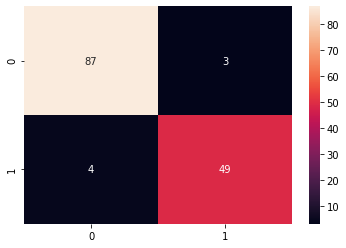

In [ ]:
sns.heatmap(cm,annot=True)
plt.savefig('test_data.png')

In [ ]:
# REMOVE CHANGEING OF ACCURACY AT RUN TIME MODEL
from keras.wrappers.scikit_learn import KerasClassifier
import sklearn
from sklearn.model_selection import cross_val_score  

In [ ]:
def built_classifier():
  classifier = Sequential()
  #First Layer (Input + Hidden Layer)
  classifier.add(Dense(output_dim = 16,init='uniform',activation='relu',input_dim=30 ))
  #Second Layer (Hidden Layer)
  classifier.add(Dense(output_dim = 16,init='uniform',activation='relu'))
  #Third Layer (Output Layer)
  classifier.add(Dense(output_dim = 1,init='uniform',activation="sigmoid" ))
  classifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])
  return classifier

In [ ]:
model = KerasClassifier(build_fn=built_classifier,batch_size=100,epochs=200)
accuracies = cross_val_score(estimator=model,X=X_train,y = Y_train,cv=10,n_jobs=-1)
accuracies



array([1.        , 1.        , 0.97674417, 1.        , 0.90697676,
       0.95348835, 1.        , 1.        , 0.97619045, 1.        ])

In [ ]:
accuracies.mean()

0.9813399732112884

In [ ]:
accuracies.std()

0.02905584116076868